In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
from skimage.color import rgb2gray
from scipy import *
from scipy import signal
from scipy import ndimage
from operator import itemgetter

In [2]:
image1 = Image.open('../data/einstein.bmp')

In [3]:
image1 = np.asanyarray(image1)

In [4]:
gray1 = rgb2gray(image1)

In [5]:
mpimg.imsave('Results/gray_einstein.jpg',gray1, cmap='gray')

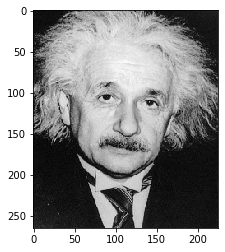

In [6]:
plt.imshow(gray1, cmap='gray')

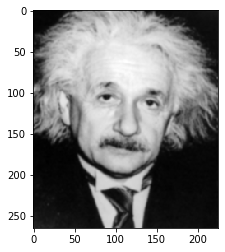

In [7]:
gray1_blurred = ndimage.gaussian_filter(gray1, sigma=1)
plt.imshow(gray1_blurred, cmap='gray')

In [8]:
def normalized_gauss_deriv(img):
    Gx = np.array([[-1,0,+1], [-2,0,+2],  [-1,0,+1]])
    Resx = ndimage.convolve(img, Gx)
    Resx = Resx/np.max(Resx)
    
    Gy = np.array([[-1,-2,-1], [0,0,0], [+1,+2,+1]])
    Resy = ndimage.convolve(img, Gy)
    Resy = Resy/np.max(Resy)
    
    return Resx, Resy

In [9]:
Fx, Fy = normalized_gauss_deriv(gray1_blurred)

In [10]:
def pad(mat, offset):
    out = np.zeros((mat.shape[0]+2*offset, mat.shape[1]+2*offset))
    for y in range (offset, out.shape[0]-offset):
        for x in range (offset, out.shape[1]-offset):
            out[y][x] = mat[y-offset][x-offset]
            
    return out

In [11]:
def corner( Fx, Fy, offset, k, th):
    fx2 = np.square(Fx)
    fy2 = np.square(Fy)
    fxfy = Fx*Fy
    
    fx2 = fx2*(1/np.square(2*offset+1))
    fy2 = fy2*(1/np.square(2*offset+1))
    fxfy = fxfy*(1/np.square(2*offset+1))
    
    harris = np.zeros_like(Fx)
    cornerList = []
    
    fx2 = pad(fx2, offset)
    fy2 = pad(fy2, offset)
    fxfy = pad(fxfy, offset)
    
    for y in range(offset, fx2.shape[0]-offset):
        for x in range(offset, fy2.shape[1]-offset):
            windowxx = fx2[y-offset:y+offset, x-offset:x+offset]
            windowyy = fy2[y-offset:y+offset, x-offset:x+offset]
            windowxy = fxfy[y-offset:y+offset, x-offset:x+offset]
            
            sxx = windowxx.sum()
            syy = windowyy.sum()
            sxy = windowxy.sum()
            
            det = sxx*syy - sxy**2
            trace = sxx + syy
            c = det - k*(trace**2)
            
            harris[y-offset][x-offset] = c
            if c>th:
                cornerList.append([x-offset, y-offset, c])
    
    #print(cornerList)
    return harris, cornerList

In [12]:
response, cornerList = corner( Fx, Fy, 4, 0.04, 0.0022)

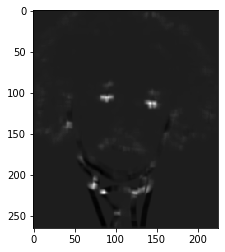

In [13]:
plt.imshow(response, cmap='gray')
plt.show()
mpimg.imsave('Results/corners/emat_einstein.jpg',response, cmap='gray')

In [14]:
def nms(img, cornerList):
    cornerList.sort(key=itemgetter(2), reverse=True)
    corners = []
    output = np.copy(img)
    
    for i in range(len(cornerList)):
        x,y,e = cornerList[i]
        corners.append([x,y])
    
    cornersC = []
    
    for i in range(len(corners)):
        x,y = corners[i]
        cornersC.append([x,y])
        
    for i in range(len(corners)):
        x,y = corners[i]
        cornersC.append([x,y])
        
        if [x+1, y] in cornersC:
            cornersC.remove([x+1, y])
        if [x+1, y-1] in cornersC:
            cornersC.remove([x+1, y-1])
        if [x+1, y+1] in cornersC:
            cornersC.remove([x+1, y+1])
        if [x, y-1] in cornersC:
            cornersC.remove([x, y-1])
        if [x, y+1] in cornersC:
            cornersC.remove([x, y+1])
        if [x-1, y] in cornersC:
            cornersC.remove([x-1, y])
        if [x-1, y-1] in cornersC:
            cornersC.remove([x-1, y-1])
        if [x-1, y+1] in cornersC:
            cornersC.remove([x-1, y+1])
        
    for i in range(len(cornersC)):
        x, y = cornersC[i]
        output.itemset((y,x,0),255)
        output.itemset((y,x,1),0)
        output.itemset((y,x,2),0)
        
        if y>=0 and y<=img.shape[0]-1 and x-1>=0 and x-1<=img.shape[1]-1:
            output.itemset((y,x-1,0),255)
            output.itemset((y,x-1,1),0)
            output.itemset((y,x-1,2),0)
        
        if y>=0 and y<=img.shape[0]-1 and x+1>=0 and x+1<=img.shape[1]-1:
            output.itemset((y,x+1,0),255)
            output.itemset((y,x+1,1),0)
            output.itemset((y,x+1,2),0)
        
        if y-1>=0 and y-1<=img.shape[0]-1 and x>=0 and x<=img.shape[1]-1:
            output.itemset((y-1,x,0),255)
            output.itemset((y-1,x,1),0)
            output.itemset((y-1,x,2),0)
    
        if y+1>=0 and y+1<=img.shape[0]-1 and x>=0 and x<=img.shape[1]-1: 
            output.itemset((y+1,x,0),255)
            output.itemset((y+1,x,1),0)
            output.itemset((y+1,x,2),0)
    
        if y-1>=0 and y-1<=img.shape[0]-1 and x-1>=0 and x-1<=img.shape[1]-1:
            output.itemset((y-1,x-1,0),255)
            output.itemset((y-1,x-1,1),0)
            output.itemset((y-1,x-1,2),0)
    
        if y-1>=0 and y-1<=img.shape[0]-1 and x+1>=0 and x+1<=img.shape[1]-1:
            output.itemset((y-1,x+1,0),255)
            output.itemset((y-1,x+1,1),0)
            output.itemset((y-1,x+1,2),0)
    
        if y+1>=0 and y+1<=img.shape[0]-1 and x-1>=0 and x-1<=img.shape[1]-1:
            output.itemset((y+1,x-1,0),255)
            output.itemset((y+1,x-1,1),0)
            output.itemset((y+1,x-1,2),0)
    
        if y+1>=0 and y+1<=img.shape[0]-1 and x+1>=0 and x+1<=img.shape[1]-1:
            output.itemset((y+1,x+1,0),255)
            output.itemset((y+1,x+1,1),0)
            output.itemset((y+1,x+1,2),0)
    
    
    
    return output

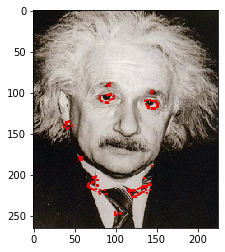

In [15]:
oImage = nms(image1, cornerList)
plt.imshow(oImage)
plt.show()
mpimg.imsave('Results/corners/corners0.0020_einstein.jpg', oImage)